# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [89]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [90]:
# Set the API base URL
base_url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
       city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
       city_lat = city_weather["coord"]["lat"]
       city_lng = city_weather["coord"]["lon"]
       city_max_temp = city_weather["main"]["temp_max"]
       city_humidity = city_weather["main"]["humidity"]
       city_clouds = city_weather["clouds"]["all"]
       city_wind = city_weather["wind"]["speed"]
       city_country = city_weather["sys"]["country"]
       city_date = city_weather["dt"]

        # Append the City information into city_data list
       city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | hammerfest
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | iskateley
Processing Record 10 of Set 1 | flying fish cove
Processing Record 11 of Set 1 | preobrazheniye
Processing Record 12 of Set 1 | wailua homesteads
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | ouarzazat
Processing Record 16 of Set 1 | brazzaville
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | zakamensk
Processing Record 21 of Set 1 | port elizabeth
Processing Record

City not found. Skipping...
Processing Record 38 of Set 4 | myeik
Processing Record 39 of Set 4 | san antonio oeste
Processing Record 40 of Set 4 | la'ie
Processing Record 41 of Set 4 | nemuro
Processing Record 42 of Set 4 | aykhal
Processing Record 43 of Set 4 | itaituba
Processing Record 44 of Set 4 | undurkhaan
Processing Record 45 of Set 4 | south hedland
Processing Record 46 of Set 4 | baker city
Processing Record 47 of Set 4 | ribeira grande
Processing Record 48 of Set 4 | mukah
City not found. Skipping...
Processing Record 49 of Set 4 | greymouth
Processing Record 0 of Set 5 | yermentau
Processing Record 1 of Set 5 | yulinshi
Processing Record 2 of Set 5 | xucheng
Processing Record 3 of Set 5 | randers
Processing Record 4 of Set 5 | mount pearl
Processing Record 5 of Set 5 | st. john's
Processing Record 6 of Set 5 | loharu
Processing Record 7 of Set 5 | mawu
Processing Record 8 of Set 5 | fallon
Processing Record 9 of Set 5 | fairview
Processing Record 10 of Set 5 | kedrovyy
Pro

Processing Record 29 of Set 8 | bodo
Processing Record 30 of Set 8 | revelstoke
Processing Record 31 of Set 8 | glen innes
Processing Record 32 of Set 8 | abraham's bay
City not found. Skipping...
Processing Record 33 of Set 8 | kondopoga
Processing Record 34 of Set 8 | campbell river
Processing Record 35 of Set 8 | pokhara
Processing Record 36 of Set 8 | siesta key
Processing Record 37 of Set 8 | pandan
Processing Record 38 of Set 8 | grand baie
Processing Record 39 of Set 8 | kristiansund
Processing Record 40 of Set 8 | pedernales
Processing Record 41 of Set 8 | berck-plage
Processing Record 42 of Set 8 | santiago
Processing Record 43 of Set 8 | miles city
Processing Record 44 of Set 8 | gazli
Processing Record 45 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 46 of Set 8 | newnham
Processing Record 47 of Set 8 | bethanie
Processing Record 48 of Set 8 | howard springs
Processing Record 49 of Set 8 | cidade velha
Processing Record 0 of Set 9 | inhambane
Processing Re

Processing Record 18 of Set 12 | bryne
Processing Record 19 of Set 12 | argo
Processing Record 20 of Set 12 | tranovaho
City not found. Skipping...
Processing Record 21 of Set 12 | tselina
Processing Record 22 of Set 12 | ginir
Processing Record 23 of Set 12 | muroran
Processing Record 24 of Set 12 | sadjoavato
City not found. Skipping...
Processing Record 25 of Set 12 | urengoy
Processing Record 26 of Set 12 | arraial do cabo
Processing Record 27 of Set 12 | ukhta
Processing Record 28 of Set 12 | cowansville
Processing Record 29 of Set 12 | illela
Processing Record 30 of Set 12 | mossel bay
Processing Record 31 of Set 12 | krapivinskiy
Processing Record 32 of Set 12 | marquette
Processing Record 33 of Set 12 | al jawf
Processing Record 34 of Set 12 | mulanje
Processing Record 35 of Set 12 | panama city beach
Processing Record 36 of Set 12 | vorkuta
Processing Record 37 of Set 12 | paramonga
Processing Record 38 of Set 12 | ecija
Processing Record 39 of Set 12 | santa ines
Processing R

In [91]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [92]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,11.73,94,100,0.00,US,1691648746
1,yellowknife,62.4560,-114.3525,18.29,55,100,3.60,CA,1691648746
2,adamstown,-25.0660,-130.1015,19.84,51,92,8.92,PN,1691648746
3,albany,42.6001,-73.9662,18.23,89,47,0.45,US,1691648630
4,hammerfest,70.6634,23.6821,22.25,68,0,0.00,NO,1691648747


In [93]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [94]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,11.73,94,100,0.00,US,1691648746
1,yellowknife,62.4560,-114.3525,18.29,55,100,3.60,CA,1691648746
2,adamstown,-25.0660,-130.1015,19.84,51,92,8.92,PN,1691648746
3,albany,42.6001,-73.9662,18.23,89,47,0.45,US,1691648630
4,hammerfest,70.6634,23.6821,22.25,68,0,0.00,NO,1691648747


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

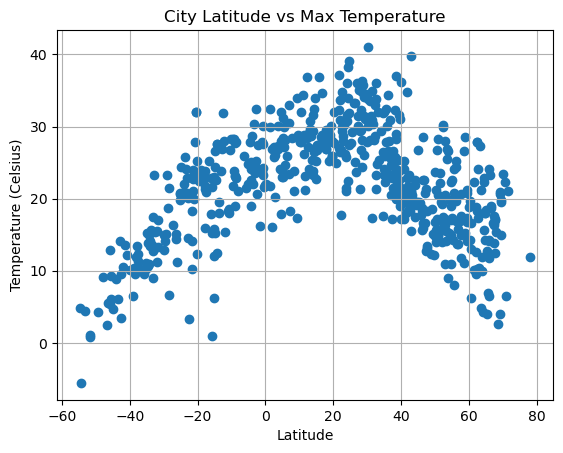

In [95]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

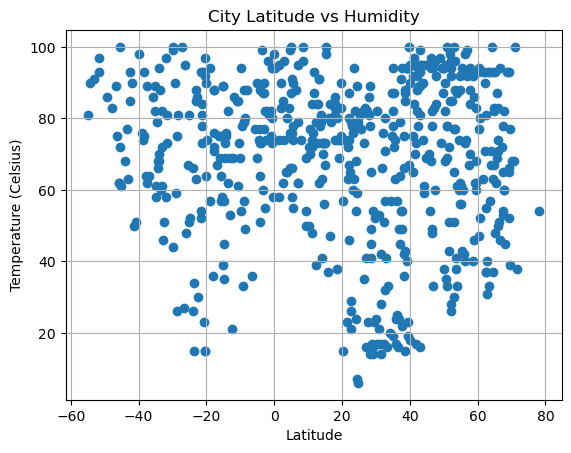

In [96]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

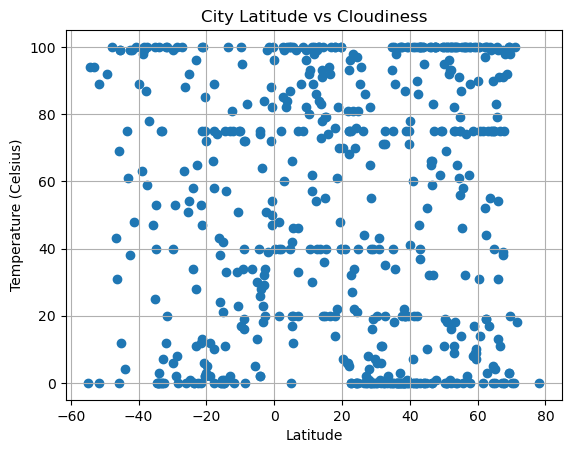

In [97]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

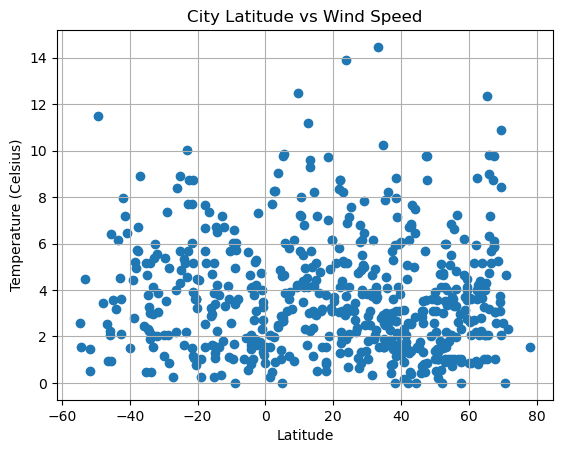

In [98]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [99]:
# Define a function to create Linear Regression plots

# LAT VS MAX TEMP

def maxtemp(x_values, y_values, coordinate, y_label): 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.annotate(line_eq,coordinate,fontsize=15,color="red")
    plt.ylabel(y_label)
    plt.xlabel('Latitude')
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-value is:{rvalue}")
    plt.show()

The r-value is:0.025313131619985895


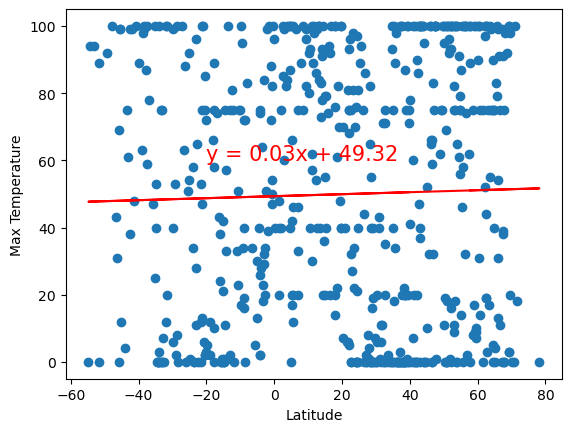

In [100]:
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
coordinate = (-20,60)
y_label = 'Max Temperature'
maxtemp(x_values, y_values, coordinate, y_label)

In [102]:
# Define a function to create Linear Regression plots

# LAT VS Cloudiness

def cloudiness(x_values, y_values, coordinate, y_label): 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.annotate(line_eq,coordinate,fontsize=15,color="red")
    plt.ylabel(y_label)
    plt.xlabel('Latitude')
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-value is:{rvalue}")
    plt.show()

The r-value is:0.025313131619985895


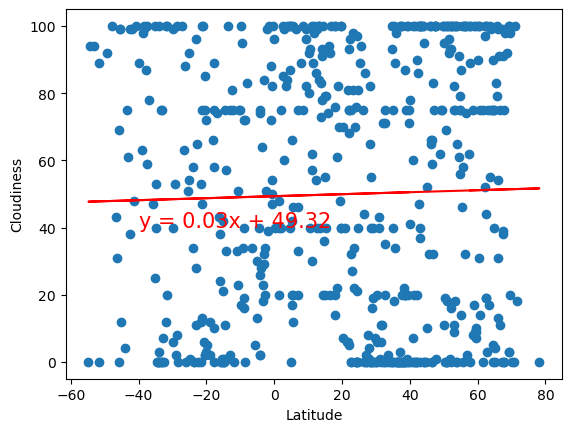

In [103]:
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
coordinate = (-40,40)
y_label = 'Cloudiness'
cloudiness(x_values, y_values, coordinate, y_label)

In [116]:
# Define a function to create Linear Regression plots

# LAT VS Wind Speed

def windspeed(x_values, y_values, coordinate, y_label): 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.annotate(line_eq,coordinate,fontsize=15,color="red")
    plt.ylabel(y_label)
    plt.xlabel('Latitude')
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-value is:{rvalue}")
    plt.show()

The r-value is:-0.05392786534120877


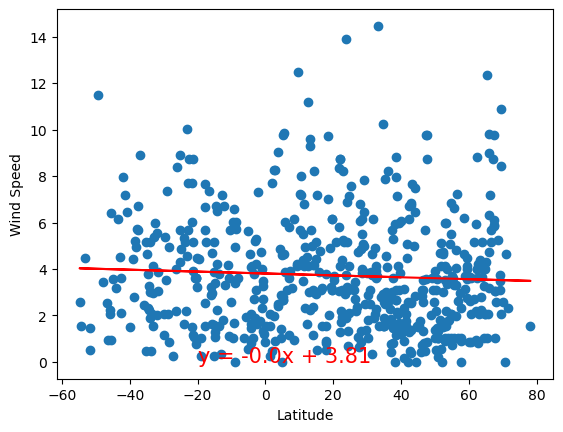

In [105]:
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
coordinate = (-20,0)
y_label = 'Wind Speed'
windspeed(x_values, y_values, coordinate, y_label)

In [106]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,11.73,94,100,0.00,US,1691648746
1,yellowknife,62.4560,-114.3525,18.29,55,100,3.60,CA,1691648746
3,albany,42.6001,-73.9662,18.23,89,47,0.45,US,1691648630
4,hammerfest,70.6634,23.6821,22.25,68,0,0.00,NO,1691648747
8,iskateley,67.6803,53.1512,17.02,60,0,3.04,RU,1691648749


In [107]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,19.84,51,92,8.92,PN,1691648746
5,avarua,-21.2078,-159.7750,24.03,73,75,8.75,CK,1691648748
6,margaret river,-33.9500,115.0667,13.47,68,100,1.89,AU,1691648748
7,invercargill,-46.4000,168.3500,5.57,75,31,0.96,NZ,1691648748
9,flying fish cove,-10.4217,105.6791,26.82,73,75,5.66,CX,1691648749


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.6264698657785828


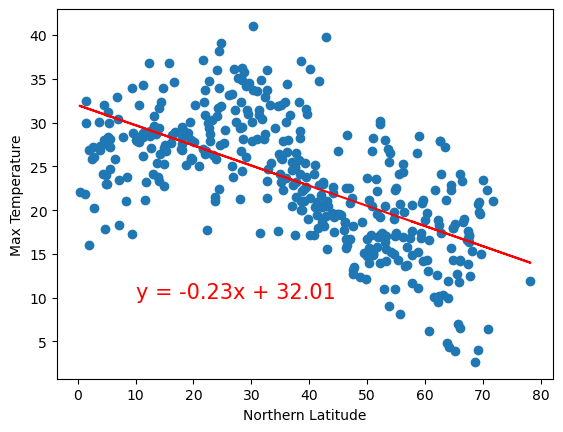

In [108]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.7730329808027102


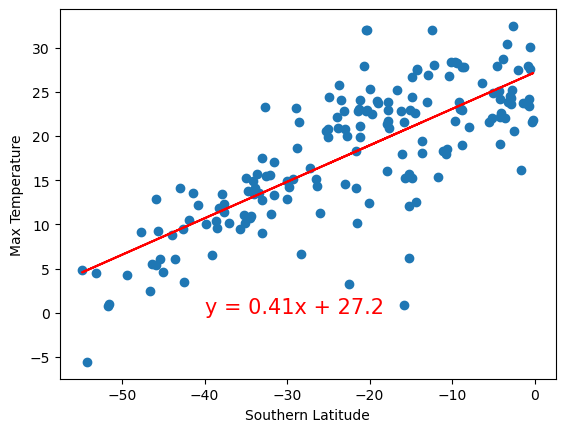

In [109]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,0),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** The r-value is printed for each hemisphere, providing a quantifiable measure of the linear relationship's strength. A higher absolute r-value suggests a stronger linear relationship

### Humidity vs. Latitude Linear Regression Plot

The r-value is:-0.004603927758324633


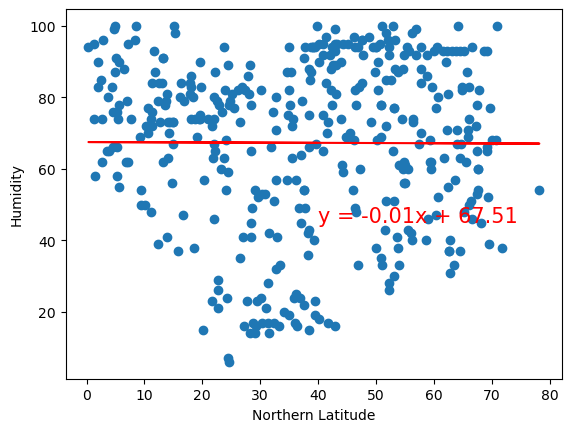

In [110]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.05447648542588248


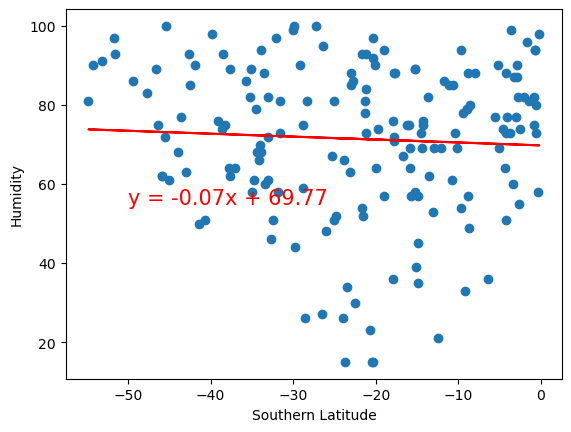

In [111]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** The analysis seeks to determine whether latitude and humidity levels exhibit a linear relationship and whether this relationship differs between hemispheres

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:-0.04040047583973374


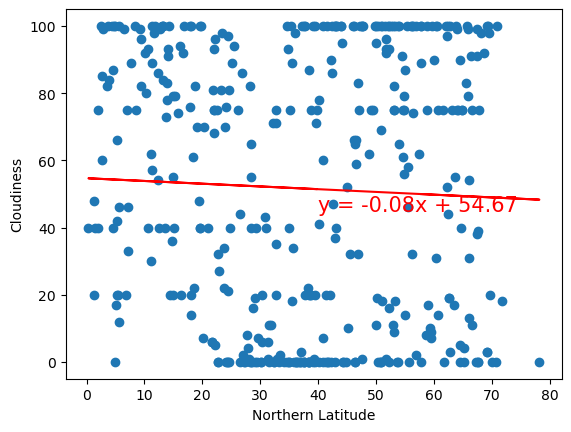

In [112]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.10884425446452803


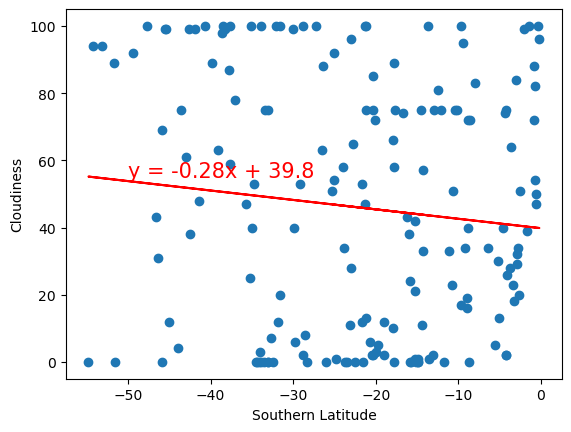

In [113]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:**  The code establishes a foundation for investigating the linear relationship between latitude and cloudiness levels in different hemispheres. The interpretation of regression results and visualizations provides insights into potential cloudiness trends and their geographic variations.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:-0.09415709178586211


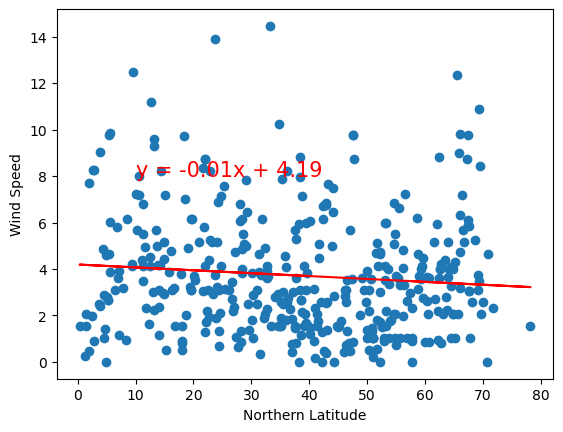

In [114]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,8),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.1062354882464893


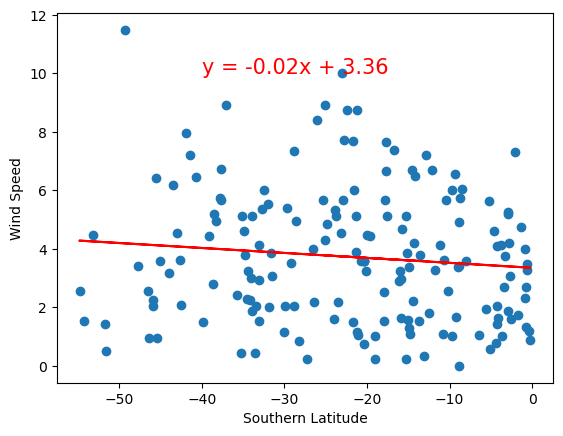

In [115]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** The code establishes a foundation for investigating the linear relationship between latitude and wind speed in different hemispheres. The interpretation of regression results and visualizations provides insights into potential wind speed trends and their geographic variations.